In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('ml-100k/u.data', sep='\t', names=['user_id','item_id','rating','timestamp'])

In [3]:
df.head()

,user_id,item_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [4]:
ratings = pd.DataFrame(df.groupby('item_id')['rating'].mean())

In [5]:
ratings['number_of_ratings'] = df.groupby('item_id')['rating'].count()

In [6]:
ratings.head()

,rating,number_of_ratings
item_id,,
1,3.878319,452
2,3.206107,131
3,3.033333,90
4,3.550239,209
5,3.302326,86


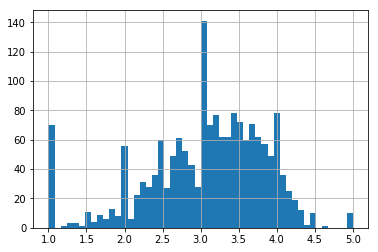

In [7]:
ratings['rating'].hist(bins=50)

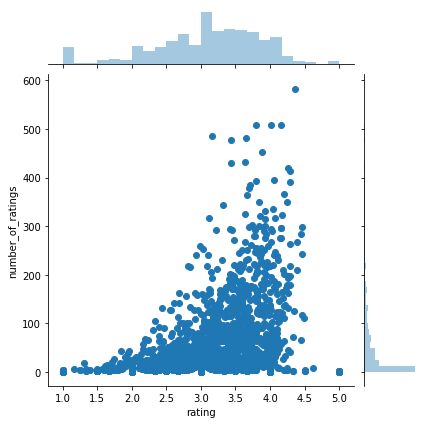

In [8]:
sns.jointplot(x='rating', y='number_of_ratings', data=ratings)

In [9]:
movie_matrix = df.pivot_table(index='user_id', columns='item_id', values='rating')
movie_matrix.head()

item_id,1,2,3,4,5,6,7,8,9,10,...,1673,1674,1675,1676,1677,1678,1679,1680,1681,1682
user_id,,,,,,,,,,,,,,,,,,,,,
1,5.0,3.0,4.0,3.0,3.0,5.0,4.0,1.0,5.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,4.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
movie1_user_rating = movie_matrix[1]
movie2_user_rating = movie_matrix[2]
movie1_user_rating.head()

user_id
1    5.0
2    4.0
3    NaN
4    NaN
5    4.0
Name: 1, dtype: float64

In [11]:
similar_to_movie1 = movie_matrix.corrwith(movie1_user_rating)

C:\Users\ErenS\AppData\Roaming\Python\Python37\site-packages\numpy\lib\function_base.py:2526: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
C:\Users\ErenS\AppData\Roaming\Python\Python37\site-packages\numpy\lib\function_base.py:2455: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


In [12]:
similar_to_movie1.head()

item_id
1    1.000000
2    0.221784
3    0.175794
4    0.103135
5    0.386475
dtype: float64

In [13]:
similar_to_movie2 = movie_matrix.corrwith(movie2_user_rating)

In [14]:
similar_to_movie2.head()

item_id
1    0.221784
2    1.000000
3    0.230536
4    0.244556
5    0.217559
dtype: float64

In [15]:
corr_movie2 = pd.DataFrame(similar_to_movie2, columns=['Correlation'])
corr_movie2.dropna(inplace=True)
corr_movie2.head()

,Correlation
item_id,
1,0.221784
2,1.000000
3,0.230536
4,0.244556
5,0.217559


In [16]:
corr_movie1 = pd.DataFrame(similar_to_movie1, columns=['correlation'])
corr_movie1.dropna(inplace=True)
corr_movie1.head()

,correlation
item_id,
1,1.000000
2,0.221784
3,0.175794
4,0.103135
5,0.386475


In [17]:
corr_movie1 = corr_movie1.join(ratings['number_of_ratings'])
corr_movie2 = corr_movie2.join(ratings['number_of_ratings'])
corr_movie1.head()

,correlation,number_of_ratings
item_id,,
1,1.000000,452
2,0.221784,131
3,0.175794,90
4,0.103135,209
5,0.386475,86


In [18]:
corr_movie2.head()

,Correlation,number_of_ratings
item_id,,
1,0.221784,452
2,1.000000,131
3,0.230536,90
4,0.244556,209
5,0.217559,86


In [19]:
corr_movie1[corr_movie1['number_of_ratings']>50].sort_values(by='correlation', ascending=False).head(10)

,correlation,number_of_ratings
item_id,,
1,1.000000,452
923,0.641535,58
892,0.558389,53
689,0.557876,87
928,0.549100,104
931,0.490491,57
489,0.486031,52
207,0.480052,66
988,0.466064,86
